# Project: No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
In this project, I will be analysing a dataset that contains data collected from more thatn 100k medical appointments in Brazil, and my focus will be to find out the whether or not patients show up for their appointment. Particularly, I will be finding out what are the characteristics of those patients who did not show up for their appointments. The following characteristics about the patients are included in this dataset: 
* **PatientId:** Identification of a patient
* **AppointmentID:** Identification of each appointment
* **Gender:** M - Male or M - Female
* **ScheduledDay:** The day of the actual appointment, when the patient has to visit the doctor.
* **AppointmentDay:** The day someone called or registered the appointment, this is before appointment of course.
* **Age:** How old the patient is.
* **Neighbourhood:** Where the appointment takes place. 
* **Scholarship:** 1 or 0. This indicates whether the patient is enrolled in the Brasilian welfare program (1) or not (0)
* **Hipertension:** 1 or 0. Shows whether the patient is hypertentive.
* **Diabetes:** 1 or 0. Shows whether the patient is diabetic (1) or not (0).
* **Alcoholism:** 1 or 0. Shows whether the patient is an alcoholic (1) or not (0).
* **Handcap:** 1 or 0. Shows whether the patient is handicapped (1) or not (0).
* **SMS_received:** 1 or 0. Whether 1 or more messages was sent to the patient (1) or not (0).
* **No-show:** 'Yes' means patient did not show up for appointment, while 'No' means patient showed up for appointment.

### Question(s) for Analysis
In determining whether patients show up for their appointments, I will be answering the following specific questions:
1. Which gender had the highest proportion of patients who did not show up for their appointments?
2. What is the age distribution of the patients who did not show up for their appointment?
3. Does being hipertensive influence whether or not a patient shows up for their appointment?

In [131]:
# Import statements for all of the packages that are used in this project.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will read the `no_show_appointments.csv` dataset into a dataframe, check for cleanliness, and then trim and clean the dataset for analysis.


### General Properties
The code in the cells below check the dimension of the data, then display a detailed view of the features of each patient and their data types. Summary statistics are also generated in order to get a deeper understanding of the dataset.

In [132]:
# Read the dataset into a dataframe and print out the first 5 records.
no_show_df = pd.read_csv('no_show_appointments.csv')
no_show_df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [133]:
# Check the number of observations and attributes of the observations in the data
no_show_df.shape

(110527, 14)

In [134]:
# Perform a more detailed view of the data, by checking for the data types of the columns 
# and whether there are any missing 
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [135]:
no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This dataset has a total of `110527 patients observed`, with `14 attributes gathered on each of them`. There are no missing values in the dataset, although there is one observation which has a negative age. This observation will be dropped, as age cannot have a value less than years. It is assumed that the age of the patients is recorded in years, and a value of 0 for age implies that these patients are infants below one year who are being taken to the hospitals by either their parents or guardians.

### Data Cleaning
In this analysis, I will be analysing the follwing attributes: `Age, Gender and Hipertension` and how they relate with the `No-show` column, which will be the dependent variable in my analysis. I will first drop all the columns I will not need for the analysis, then I will change all the column names to have lowercase characters. I will also drop the observation(s) with negative age value. All this cleaning will be performing using a function called `clean_dataset` which I define.

In [136]:
def clean_dataset(df):
    '''This function takes a dataframe and drops the columns not required for analysis and any errant data'''
    # Drop columns not required for the analysis
    df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood',
                          'Scholarship', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'], inplace=True)
    
    # Change column names to lowercase and rename
    df.columns=no_show_df.columns.str.lower()
    
    # Rename some columns
    df.rename(columns={'hipertension':'hypertension', 'no-show':'no_show'}, inplace=True)
    
    # Drop observation(s) with negative age values
    df.drop(no_show_df[no_show_df.age < 0].index, inplace=True)
    
    return df

In [137]:
# Perform data cleaning on the 'no-show appointments' dataset
# and view the first five rows of the cleaned dataset

clean_dataset(no_show_df).head()

,gender,age,hypertension,no_show
0,F,62,1,No
1,M,56,0,No
2,F,62,0,No
3,F,8,0,No
4,F,56,1,No


In [138]:
# Generate summary statistics for the independent variables 'age' and 'hypertension'
no_show_df.describe()

,age,hypertension
count,110526.000000,110526.000000
mean,37.089219,0.197248
std,23.110026,0.397923
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis
In this section of the analysis, I create visualizations with the goal of addressing the research questions that have been posed in the Introduction section. In the visualisations below, I investigate the distibrutions of the features I will analyse using histograms for numerica data and bar charts for categorical data.

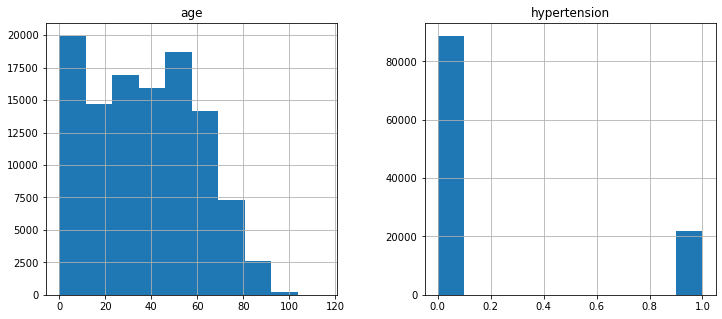

In [139]:
# Plot histograms of the features with numeric data, i.e age, hypertension.
no_show_df.hist(figsize=(12,5));

From the two histograms above, it can be seen that the age of the majority of the patients observed was below 65 years and that most of these patients were not hypertensive. However, there is need to use descriptive statistics to get a deeper understanding about the age of the patients. This is done using the `describe` function as shown below.

In [140]:
# Pandas describe() function is used to generate descriptive statistics for the feature 'age' 
no_show_df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

From the descriptive statistics summary generated above, it can be observed that the average age is 37 years, the minimumun is 0, and the maximum age is 115 years. However, looking at the difference between the average age and the maximum age, it is highly likely that the mean age was affected by the presence of outliers in the age variable. Therefore, I will check for the presence of outliers in the `age` variable. This will be done first by creating a box plot, and then computing the actual values using the interquartile range method. This process is demostrated below.

#### Detecting Outliers Using a Boxplot

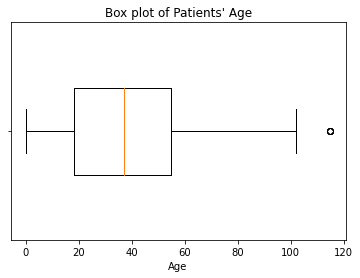

In [141]:
# Using matplotlib to create a boxplot and check for the presence of outliers in the 'age' feature.

plt.boxplot(no_show_df["age"], widths=0.4, vert=False);
plt.title("Box plot of Patients' Age");
plt.xlabel("Age");
plt.yticks([1], [""]);

The generated box plot above shows that there are outliers in the age variable. It apears that the maximum age of 115 years is an outlier, and this is confirmed by using the interquartile range method below.

#### Detecting Outliers Using Interquartile Range

>The interquartile range method defines outliers as values larger than the upper bound (i.e., Q3 + 1.5 * IQR) or the values smaller than the lower bound (i.e., Q1 – 1.5 * IQR), where
>* Q3 = the upper quartile
>* Q1 = the lower quartile
>* IQR = the interquartile range (i.e, Q3 - Q1)

In [142]:
# Compute the interquartile range (iqr) as follows:

lower_quart = round(no_show_df['age'].quantile(.25)) # lower quartile
upper_quart = round(no_show_df['age'].quantile(.75)) # upper quartile
iqr = upper_quart - lower_quart # interquartile range

print(f"The lower quartile of {lower_quart} shows that 25% of the patients are below the age of {lower_quart}.\
      \nThe upper quartile of {upper_quart} shows that 75% of the patients are below the age of {upper_quart}.")

The lower quartile of 18 shows that 25% of the patients are below the age of 18.      
The upper quartile of 55 shows that 75% of the patients are below the age of 55.


In [143]:
# Compute the upper and lower bounds as follows:

lower_bound = round(lower_quart - (1.5 * iqr))
upper_bound = round(upper_quart + (1.5 * iqr))

print(f"Lower bound: {lower_bound}\nUpper bound: {upper_bound}")

Lower bound: -38
Upper bound: 110


As indicated by the computed results of the interquartile range method above, all observations with age values above 110 years are outliers and must be dropped because these data point deviate from the pattern of the observations. As for the lower bound, however, since age cannot be a negative value, the lower bound is zero. This result agrees with the result depicted in the box plot above.

#### Dropping Outliers

Before dropping any outliers from the dataset, there were `110526` observations. The following code statement drops all the observations whose age is greater that 110 years.

In [144]:
# Drop all records where age greater than 110
no_show_df.drop(no_show_df.index[no_show_df['age'] >= 110], inplace=True)
no_show_df.shape

(110521, 4)

In [145]:
# Generate summary statistics in order to get another look at the changes to the 'age' feature
no_show_df['age'].describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: age, dtype: float64

From the above results, it can be observed that five observations were outliers, which are now excluded from the dataset. The maximum age is now 102 year, which is quite sensible compared to 115 years.

### Research Question 1:	Which gender had the highest proportion of patients who did not show up for their appointments?

It order to determine which gender had the highest number of patients who did not show up for their appointments, I will first create a bar chart which will compare the number of female patients who attended and did not attend their appointments versus the number of males who attended and did not attend their appointments. Then, I will compute actual numbers to support my observations from the chart.

#### Gender vs No_show Distribution
According to the bar chart below, the majority of the observed patients were females, and that more females compared to males attended their scheduled appointments. This is shown by the `(F, No)` bar being higher than the `(M, No)` bar. However, the chart also shows that among all the patients who did not attend their scheduled appointments, the number of female patients was more than that of men. This is shown by the `(F, Yes)` bar being higher than the `(M, Yes)` bar. The computations below the graph show the actual values to support this observation.

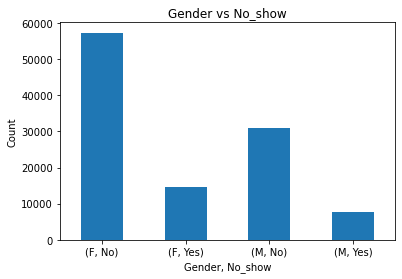

In [146]:
no_show_df.groupby(['gender'])['no_show'].value_counts().plot(kind='bar', stacked=True);
plt.title('Gender vs No_show');
plt.xlabel('Gender, No_show');
plt.ylabel('Count')
plt.xticks(rotation=0);

#### Actual Computations
To determine the proportion of females that did not attend their scheduled appointments, I first compute the total number of patients who did not attend their appointments, irrespective of their gender. Then I will find out what fraction of those patients are male and female, respectively. The code below demostrates this computation.

In [147]:
# The percentage of patients who did not show up for their appointments is computed below:
no_show_mask = no_show_df['no_show'] == 'Yes' # Create a mask of the patients who did not show up for their appointments

sum(no_show_mask)/len(no_show_df) * 100

20.19163778829363

In [148]:
# Calculate the total number of patients who did not attend their scheduled appointments
total_no_show = no_show_df.no_show[no_show_mask].count()

# The next two code statements get the number of female and male patients that did not show for their scheduled appointments
female_no_show = no_show_df['gender'][no_show_mask].value_counts()[0]
male_no_show = no_show_df['gender'][no_show_mask].value_counts()[1]


print(f'A total of {total_no_show} patients did not attend their appointments. \
        \nThis is made up of {female_no_show} females and {male_no_show} males.')

A total of 22316 patients did not attend their appointments.         
This is made up of 14591 females and 7725 males.


In [149]:
# Determine the proportion of female and male patients who did not attend their scheduled appointments
female_prop = (female_no_show/total_no_show) * 100
male_prop = (male_no_show/total_no_show) * 100

print(f"{round(female_prop)}% of patients who did not attend their appointments were female \
and {round(male_prop)}% were male.")

65% of patients who did not attend their appointments were female and 35% were male.


The computational results above simply support what was observed in the bar chart above, that females made up the majority of the patients who did not show up for their scheduled appointments.

### Research Question 2. What is the age distribution of the patients who did not show up for their appointment?

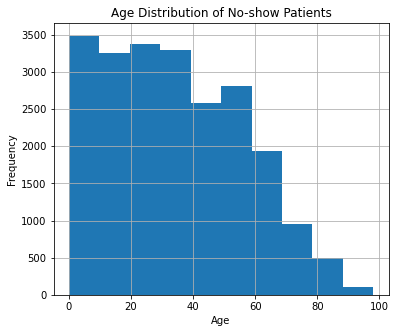

In [150]:
# Histogram to determine the age distribution of the patients who did not show up
# for their appointments

no_show_df.age[no_show_mask].hist(figsize=(6, 5));
plt.title('Age Distribution of No-show Patients');
plt.xlabel('Age');
plt.ylabel('Frequency');

From the histogram above, it can be observed that the majority of the patients who did not attend their scheduled appointments were 55 years old and below, with the highest numbers being around 35 years and below. The summary statistics below appear to show a similar result.

In [152]:
# Summary of the statistics to support the observation on the age distribution of the patients
# who did not attend their appointments

round(no_show_df.age[no_show_mask].describe())

count    22316.0
mean        34.0
std         22.0
min          0.0
25%         16.0
50%         33.0
75%         51.0
max         98.0
Name: age, dtype: float64

### Research Question 3. Does being hypertensive influence whether a patient shows up for their appointment?
This question tries to determine whether there is a relationship between being hypertensive and attending scheduled appointments. In order to investigate this relationship, I will use a descriptive statistic of multi-variable data called a correlation matrix, which will represent the ‘correlations’ between the variables `no_show` and the independent variables `age` and `hypertension` in the `no_show_appointments` data.

#### Creating a correlation matrix
Since the `no_show` variable contains non-numeric values, I first create a copy of the initial dataframe and then replace the "Yes" values with 0 and the "No" values with 1 in the copy dataframe. Then I will generate a correlation matrix of the copy dataframe, and lastly plot the matrix in a heatmap. The code below demonstrates these processes.

In [153]:
# Create a copy of the initial dataframe and then change the values of the 'no_show' variable
no_show_df2 = no_show_df.copy()
no_show_df2['no_show'].replace({"Yes": 0, "No": 1}, inplace=True)

In [154]:
# Generate a correlation matrix of the copy dataframe
no_show_df2.corr()

,age,hypertension,no_show
age,1.000000,0.504726,0.060497
hypertension,0.504726,1.000000,0.035673
no_show,0.060497,0.035673,1.000000


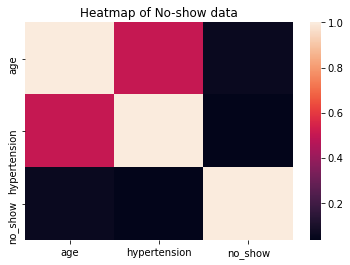

In [155]:
# Plot the correlation matrix in a heatmap
sns.heatmap(no_show_df2.corr());
plt.title('Heatmap of No-show data');

According to the correlation matrix, a value close to 0 indicates the absence of any correlation between the two variables, meaning the variables being compared are independent of each other. As can be seen from the correlation matrix, the value of the intersection between the `no_show` variable and the `hypertension` variable is 0.035673, which represents a very small correlation between the two variables. This is also shown by the shades of the heatmap, where darker shades of color indicate smaller values while brighter shades correspond to larger values (nearer to 1). It can be observed that it is only `age` and `hypertension` features that have a relatively strong correlation with each other (0.504726).

<a id='conclusions'></a>
## Conclusions
>**Findings:** My findings showed that:
>
>(a) Out of the patients who did not show up for their appointments, about 65% of them were female.
>
>(b) The age distribution of the patients who did not attend their scheduled appointments was below 55 years. 
>
>(c) Being hypertensive has no influence on whether patients showed up for their scheduled appointments.
>
>(d) There is a correlation between age and hypertension

**Limitations:** The following were some of my limitations
>
>(a) The number of charts that can be plotted using categorical data is limited 
>
>(b) Further research needs to be conducted in order to determine why more females missed their scheduled appointments as this cannot be inferred from the data. 
>
>(c) It is not possible to ascertain what mode of transportation the patients used to get to their appointments. This information was missing.

## Submitting your Project 

In [325]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])